In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl

Processing c:\users\user\downloads\ta_lib-0.4.19-cp38-cp38-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import requests as re
from bs4 import BeautifulSoup
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import os

In [8]:
folder_adress = 'C:/Users/user/Downloads/model' 
def get_trading_trend():
    url = 'http://finance.naver.com/sise/investorDealTrendDay.nhn?bizdate=20210217&sosok=&page='
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
    #response = requests.get(news_url,headers = headers)

    date_list = []
    private = []
    foreign = []
    institution = []

    for i in range(1,500):
        url_ = re.get(url + str(i),headers = headers)
        url_.encoding = 'euc-kr' #한글깨짐방지
        url_ = url_.content
        html = BeautifulSoup(url_,'html.parser')
    
        body = html.find('body')
    
        tr = body.find_all('tr')

        for r in tr:
            date = r.find('td',{'class':'date2'})
    
            if date != None:
                date = date.text.strip().replace('.','-')
                date = date[6:] + '-' + date[3:5] + '-' + date[:2]
                #date = date.text.insert('20-01-01')
                #date = date.text.insert('01-01-20')
                
                
                # 날짜가 중첩되지 않으면 계속 크롤링 : 
                if not date in date_list:
                    date_list.append(date)
                    #print(date)
                
                # 더 이상 자료가 없어, 날짜가 중첩되면 : 크롤링 완료
                else:
                    #Data = DataFrame(index = date_list)
                    Data = DataFrame()
                    Data['date'] = date_list
                    Data['private'] = private
                    Data['foreign'] = foreign
                    Data['institution'] = institution
                    
                    Data.to_csv(folder_adress+'/trading_trend.csv')
                    return Data
                
                td = r.find_all('td')
        
                count = 0
        
                # 앞에서 3개 값 '개인' , '외국인' , '기관' 만 가져온다
                for d in td:
                    if count != 3:
                        d = d.text.replace(',','')
                    try:
                        d = int(d)
                    
                        if count == 0 :
                            private.append(d)
                        elif count == 1 :
                            foreign.append(d)
                        else:
                            institution.append(d)
                        
                        count += 1
                    
                    except:
                        count = count

In [9]:
#get_trading_trend()

In [10]:
samsung_etc = pd.read_csv('C:/Users/user/Downloads/model/trading_trend.csv',parse_dates=['date'])

In [11]:
samsung_etc

,Unnamed: 0,date,private,foreign,institution
0,0,2021-02-17,18107,-4815,-13465
1,1,2021-02-16,4226,2416,-6685
2,2,2021-02-15,-3526,7317,-4193
3,3,2021-10-02,1302,7520,-9166
4,4,2021-09-02,487,-2223,1568
...,...,...,...,...,...
3983,3983,2005-07-01,1143,178,-1321
3984,3984,2005-06-01,858,-6,-852
3985,3985,2005-05-01,10,246,-256
3986,3986,2005-04-01,-63,397,-334


In [12]:
samsung_etc = samsung_etc.drop(['Unnamed: 0'], axis=1)

In [13]:
samsung_etc = samsung_etc.set_index("date")

In [14]:
# 크롤링 start_date, end_date
start_date='2019-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2021-02-20'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

In [15]:
# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]



In [26]:
# 코로나 이전날짜
# 주요 3개국 대비 원 환율
# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
#macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
#model_samsung['macd'] = macd

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Volume'], axis=1)

#QQQ
qqq=yf.download("QQQ", start=start_date, end=end_date)
qqq.columns = ['qqq_Open','qqq_High','qqq_Low','qqq_Close','qqq_Adj Close','qqq_Volume']
qqq = qqq.drop(['qqq_Open','qqq_High','qqq_Low','qqq_Close','qqq_Volume'], axis=1)
                
# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)                  
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX = yf.download("SOXX", start=start_date, end=end_date)
SOXX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX = SOXX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Volume'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
model_samsung = model_samsung.drop(['Open','High','Low'],axis=1)


In [28]:
model_samsung = pd.concat([model_samsung, samsung_etc],axis=1)

In [29]:
# samsung 모델
lst_label = ['a']
for i in range(len(model_samsung)-1):
    lst_label.append(model_samsung.iloc[i+1]['Close'] - model_samsung.iloc[i]['Close']) # 전일 주가 = 당일 주가 : 2

model_samsung['Labeling'] = lst_label
model_samsung = model_samsung.drop(model_samsung[model_samsung['Labeling'] == 'a'].index) # 첫 행 삭제
#model_samsung['Labeling'] = model_samsung['Labeling'].astype("category")
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [32]:
#model_samsung['sum'] = model_samsung['private'] +  model_samsung['foreign'] +  model_samsung['institution']
#model_samsung_['sum'] = model_samsung_['private'] +  model_samsung_['foreign'] +  model_samsung_['institution']
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['SOXX'] = SOXX
model_samsung['hang_seng'] = hang_seng_
model_samsung['qqq'] = qqq

In [33]:
# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [34]:
vix = fdr.DataReader('VIX', '1990-01-01', '2021-02-23') # S&P 500 VIX
vix.iloc[-5:]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-02-17,21.50,22.02,23.44,21.09,0.0,0.0019
2021-02-18,22.49,21.98,24.23,21.80,0.0,0.0460
2021-02-19,22.05,23.10,23.19,20.84,0.0,-0.0196
2021-02-22,23.45,24.46,25.09,21.96,0.0,0.0635
2021-02-23,23.11,22.82,27.01,22.50,0.0,-0.0145


Text(2020-03-09, 54.46, '54.46')

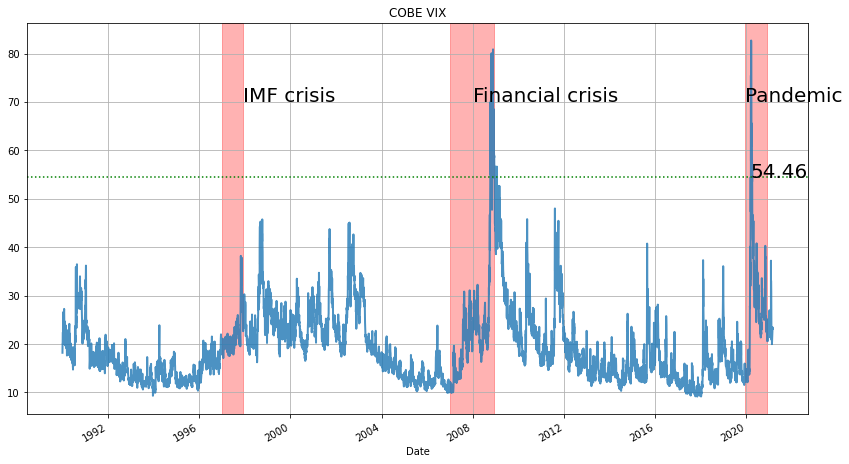

In [35]:
#@vix index
ax = vix['Close'].plot(lw=2, alpha=0.8, title='COBE VIX')

# 외환위기
ax.axvspan('1997-01', '1997-12', alpha=0.3, color='red') 
ax.annotate('IMF crisis', xy=('1997-12-03', 70), fontsize=20)

# 금융위기
ax.axvspan('2007-01', '2008-12', alpha=0.3, color='red') 
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 

# 팬데믹
ax.axvspan('2019-12', '2020-12', alpha=0.3, color='red') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 

# 2020-03-09 VIX 4.46
ax.axhline(54.46, ls=':', c='g') # 51.55 (2020-03-09 VIX)
ax.annotate('54.46', xy=('2020-03-09', 54.46), fontsize=20)

In [36]:
model_samsung

,Close,Volume,private,foreign,institution,Labeling,US,SNP500,SOXX,hang_seng,qqq
2019-01-04,37450.0,14108958.0,-4381.0,2491.0,1846.0,-150.0,1116.85,2531.939941,151.419434,25626.029297,154.075851
2019-01-07,38750.0,12748997.0,-191.0,1545.0,61.0,1300.0,1117.66,2549.689941,154.215530,25835.699219,155.910202
2019-01-08,38100.0,12756554.0,-873.0,-51.0,836.0,-650.0,1122.83,2574.409912,153.543304,25875.449219,157.320496
2019-01-10,39800.0,14731699.0,-1585.0,-1426.0,2951.0,200.0,1117.79,2596.639893,158.882233,26521.429688,159.056213
2019-01-11,40500.0,11661063.0,-594.0,1378.0,-1184.0,700.0,1118.23,2596.260010,160.587234,26667.269531,158.474335
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29,82000.0,39615978.0,16971.0,-14220.0,-2544.0,-1700.0,1117.64,3714.239990,391.420013,28283.710938,314.559998
2021-02-02,84400.0,26302077.0,-1883.0,1966.0,-131.0,1400.0,1115.37,3826.310059,413.480011,29248.699219,327.679993
2021-02-15,84200.0,23529706.0,-3526.0,7317.0,-4193.0,2600.0,1101.31,NaN,NaN,NaN,NaN
2021-02-16,84900.0,20483100.0,4226.0,2416.0,-6685.0,700.0,1106.58,3932.590088,439.359985,30746.660156,335.540009


In [37]:
samsung_model_30 = pd.DataFrame()

samsung_model_30['private_30'] = model_samsung.private.resample('1M').first()
samsung_model_30['foreign_30'] = model_samsung.foreign.resample('1M').first()
samsung_model_30['institution_30'] = model_samsung.institution.resample('1M').first()
samsung_model_30['Labeling_30'] = model_samsung.Labeling.resample('1M').first()
samsung_model_30['sum_30'] = samsung_model_30['private_30'] +  samsung_model_30['foreign_30'] +  samsung_model_30['institution_30']
samsung_model_30['Labeling_30'] = samsung_model_30['Labeling_30'].apply(pd.to_numeric)


In [38]:
samsung_model_60 = pd.DataFrame()
samsung_model_60['private_60'] = model_samsung.private.resample('2M').first()
samsung_model_60['foreign_60'] = model_samsung.foreign.resample('2M').first()
samsung_model_60['institution_60'] = model_samsung.institution.resample('2M').first()
samsung_model_60['sum_60'] = samsung_model_60['private_60'] +  samsung_model_60['foreign_60'] +  samsung_model_60['institution_60']
samsung_model_60['Labeling_60'] = model_samsung.Labeling.resample('2M').first()
samsung_model_60['Labeling_60'] = samsung_model_60['Labeling_60'].apply(pd.to_numeric)

In [39]:
samsung_model_90 = pd.DataFrame()
samsung_model_90['private_90'] = model_samsung.private.resample('3M').first()
samsung_model_90['foreign_90'] = model_samsung.foreign.resample('3M').first()
samsung_model_90['institution_90'] = model_samsung.institution.resample('3M').first()
samsung_model_90['sum_90'] = samsung_model_90['private_90'] +  samsung_model_90['foreign_90'] +  samsung_model_90['institution_90']
samsung_model_90['Labeling_90'] = model_samsung.Labeling.resample('3M').first()
samsung_model_90['Labeling_90'] = samsung_model_90['Labeling_90'].apply(pd.to_numeric)

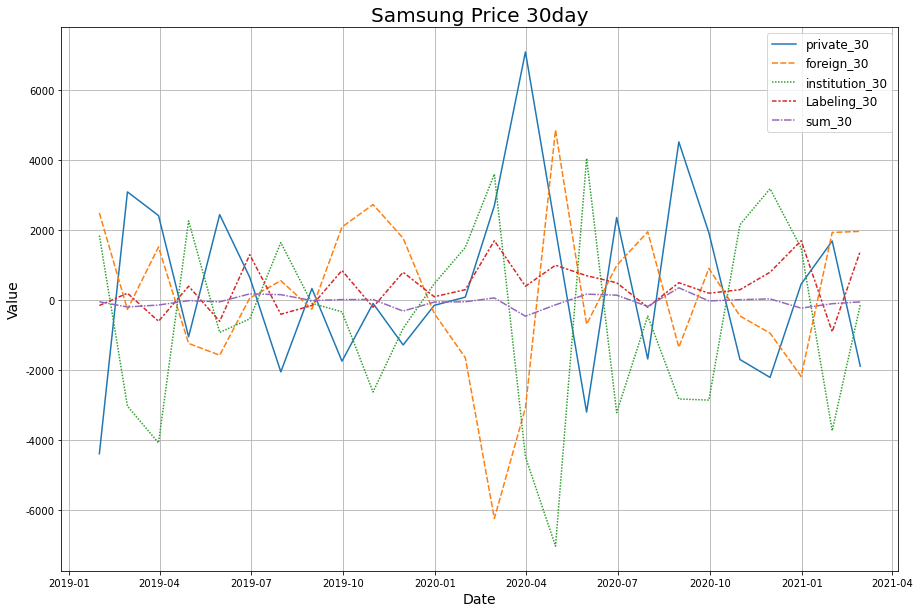

In [40]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
plt.figure(figsize=(15,10))
#ax = sns.lineplot(data=samsung_model[['private_30', 'foreign_30','institution_30']])
ax = sns.lineplot(data=samsung_model_30[['private_30', 'foreign_30','institution_30','Labeling_30','sum_30']])

# 팬데믹
#ax.axvspan('2019-12', '2020-04', alpha=0.3, color='red') 
#ax.annotate('Pandemic', xy=('2019-12', 6000), fontsize=20) 
#ax2 = sns.barplot(data=samsung_model[['Labeling_30']])
plt.title('Samsung Price 30day', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

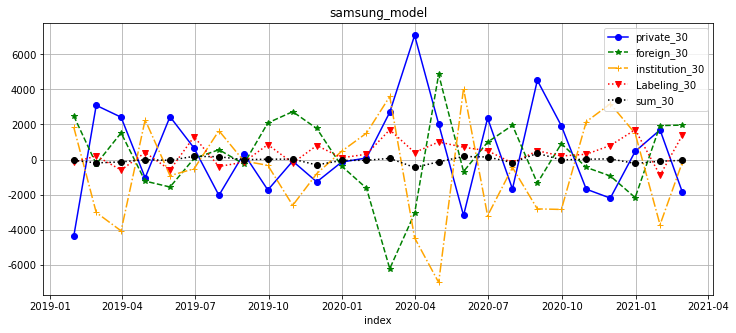

In [41]:
import seaborn as sns

fig = plt.figure(figsize = (12, 5))
chart = fig.add_subplot(1,1,1)

chart.plot(samsung_model_30.private_30, marker='o', color='blue', linestyle='-', label='private_30')

#chart.bar(samsung_model.private_30, color='blue', width=20,label='private_30')
chart.plot(samsung_model_30.foreign_30, marker='*', color='green', linestyle='--', label='foreign_30')
chart.plot(samsung_model_30.institution_30, marker='+', color='orange', linestyle='-.', label='institution_30')
chart.plot(samsung_model_30.Labeling_30, marker='v', color='red', linestyle=':', label='Labeling_30')
chart.plot(samsung_model_30.sum_30, marker='o', color='black', linestyle=':', label='sum_30')

#chart.hist(samsung_model.Labeling_30)
#chart.plot(model_samsung.Close, marker='v', color='red', linestyle=':', label='Close')
#x = np.arange(len(samsung_model.index))
### bar 그래프
#plt.bar(x , samsung_model.private_30,color='green')
#plt.bar(samsung_model.index, samsung_model.foreign_30,color='blue',bottom=samsung_model.private_30)
#plt.bar(samsung_model.index, samsung_model.institution_30,color='orange',bottom=samsung_model.private_30+samsung_model.foreign_30, linestyle='dashed',edgecolor='k')

#samsung_model['samsung_model'].plot(kind='bar')

# 차트 구성요소 추가
chart.set_title('samsung_model')
plt.xlabel("index")
#plt.ylabel("randum number")
plt.legend(loc = 'best') # 범례는 상단에

In [42]:
def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-1*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*1.8
        posy = height*1.01
        #ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom')

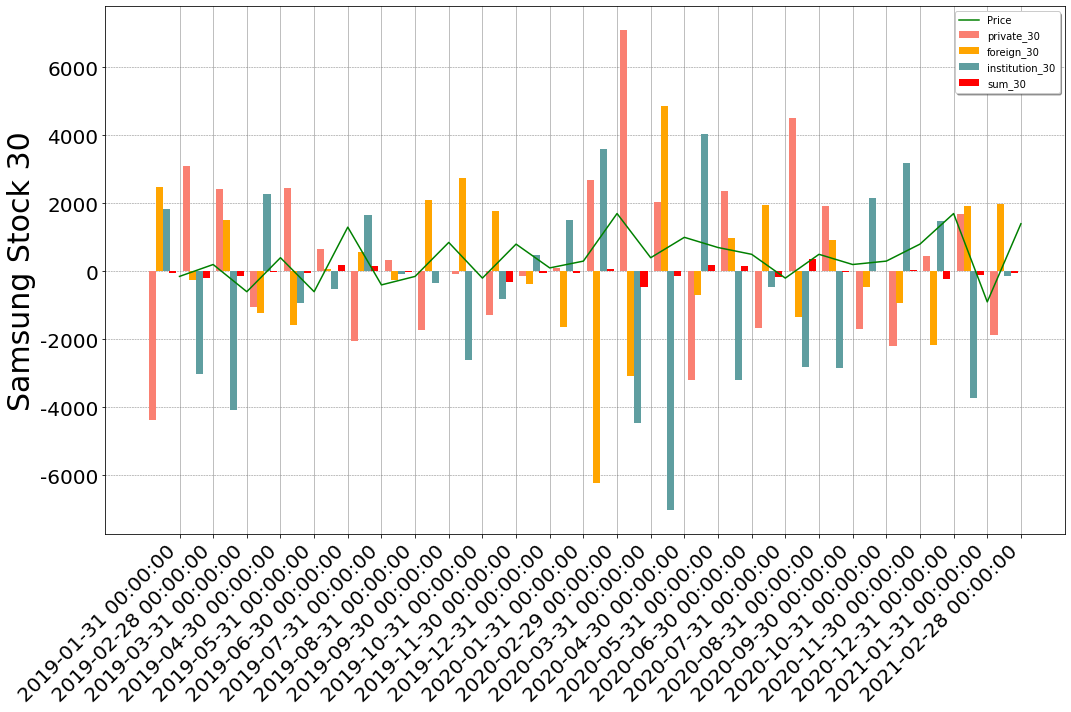

In [43]:
import matplotlib.dates as mdates

models = ['private_30', 'foreign_30','institution_30','sum_30','Labeling_30']
xticks = samsung_model_30.index
#### 2. matplotlib의 figure 및 axis 설정
fig, ax = plt.subplots(1,1,figsize=(15,10)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
colors = ['salmon', 'orange', 'cadetblue', 'red']
#colors = ['salmon', 'orange', 'cadetblue']
width = 0.2

#### 3. bar 그리기
for i, model in enumerate(models):
    pos = compute_pos(xticks, width, i, models)
    if (model != 'Labeling_30'):
        bar = ax.bar(pos, samsung_model_30[model], width=width*1.05, label=model, color=colors[i])
    else:
        ax.plot(pos, samsung_model_30[model], color='green', label='Price')
    
    present_height(ax, bar) # bar높이 출력

    

#### 4. x축 세부설정
ax.set_xticks(range(len(xticks)))
#ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m'))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xticklabels(xticks, fontsize=20)
#ax.set_xticks(xticks)
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
fig.autofmt_xdate(rotation=45)
#ax.set_xlabel('Cancer type', fontsize=30)

#### 5. y축 세부설정
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel('Samsung Stock 30', fontsize=30)

#### 6. 범례 나타내기
ax.legend(loc='upper right', shadow=True, ncol=1)

#### 7. 보조선(눈금선) 나타내기
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

#### 8. 그래프 저장하고 출력하기
plt.tight_layout()
plt.savefig('ex_barplot.png', format='png', dpi=300)
plt.show()


In [44]:
samsung_model_60

,private_60,foreign_60,institution_60,sum_60,Labeling_60
2019-01-31,-4381.0,2491.0,1846.0,-44.0,-150.0
2019-03-31,3093.0,-262.0,-3024.0,-193.0,200.0
2019-05-31,-1044.0,-1233.0,2264.0,-13.0,400.0
2019-07-31,654.0,60.0,-532.0,182.0,1300.0
2019-09-30,334.0,-257.0,-87.0,-10.0,-150.0
2019-11-30,-92.0,2732.0,-2619.0,21.0,-200.0
2020-01-31,-147.0,-375.0,469.0,-53.0,100.0
2020-03-31,2700.0,-6233.0,3599.0,66.0,1700.0
2020-05-31,2026.0,4863.0,-7020.0,-131.0,1000.0
2020-07-31,2363.0,991.0,-3209.0,145.0,500.0


Labeling_60


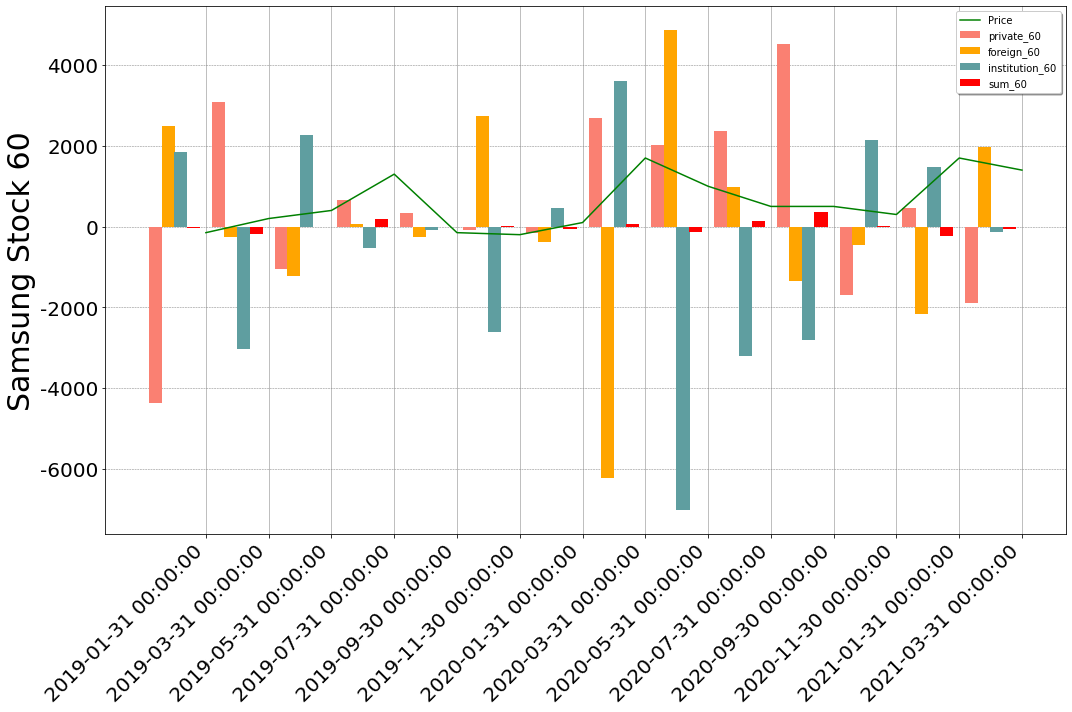

In [45]:
import matplotlib.dates as mdates

models = ['private_60', 'foreign_60','institution_60','sum_60','Labeling_60']
xticks = samsung_model_60.index
#### 2. matplotlib의 figure 및 axis 설정
fig, ax = plt.subplots(1,1,figsize=(15,10)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
colors = ['salmon', 'orange', 'cadetblue', 'red']
#colors = ['salmon', 'orange', 'cadetblue']
width = 0.2

#### 3. bar 그리기
for i, model in enumerate(models):
    pos = compute_pos(xticks, width, i, models)
    if (model != 'Labeling_60'):
        bar = ax.bar(pos, samsung_model_60[model], width=width*1.05, label=model, color=colors[i])
    else:
        print(model)
        ax.plot(pos, samsung_model_60[model], color='green', label='Price')
    
    present_height(ax, bar) # bar높이 출력

    

#### 4. x축 세부설정
ax.set_xticks(range(len(xticks)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xticklabels(xticks, fontsize=20)

fig.autofmt_xdate(rotation=45)
#ax.set_xlabel('Cancer type', fontsize=30)

#### 5. y축 세부설정
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel('Samsung Stock 60', fontsize=30)

#### 6. 범례 나타내기
ax.legend(loc='upper right', shadow=True, ncol=1)

#### 7. 보조선(눈금선) 나타내기
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

#### 8. 그래프 저장하고 출력하기
plt.tight_layout()
plt.savefig('ex_barplot2.png', format='png', dpi=300)
plt.show()


Labeling_90


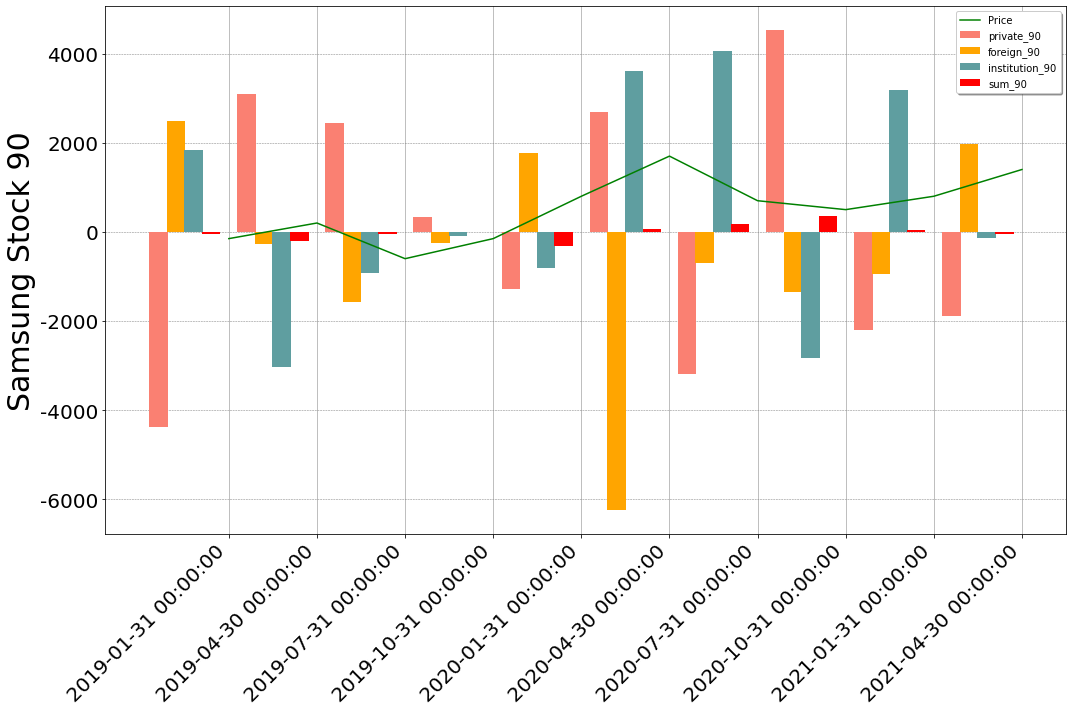

In [46]:
import matplotlib.dates as mdates

models = ['private_90', 'foreign_90','institution_90','sum_90','Labeling_90']
xticks = samsung_model_90.index
#### 2. matplotlib의 figure 및 axis 설정
fig, ax = plt.subplots(1,1,figsize=(15,10)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
colors = ['salmon', 'orange', 'cadetblue', 'red']
#colors = ['salmon', 'orange', 'cadetblue']
width = 0.2

#### 3. bar 그리기
for i, model in enumerate(models):
    pos = compute_pos(xticks, width, i, models)
    if (model != 'Labeling_90'):
        bar = ax.bar(pos, samsung_model_90[model], width=width*1.05, label=model, color=colors[i])
    else:
        print(model)
        ax.plot(pos, samsung_model_90[model], color='green', label='Price')
    
    present_height(ax, bar) # bar높이 출력

    

#### 4. x축 세부설정
ax.set_xticks(range(len(xticks)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xticklabels(xticks, fontsize=20)

fig.autofmt_xdate(rotation=45)
#ax.set_xlabel('Cancer type', fontsize=30)

#### 5. y축 세부설정
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel('Samsung Stock 90', fontsize=30)

#### 6. 범례 나타내기
ax.legend(loc='upper right', shadow=True, ncol=1)

#### 7. 보조선(눈금선) 나타내기
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

#### 8. 그래프 저장하고 출력하기
plt.tight_layout()
plt.savefig('ex_barplot2.png', format='png', dpi=300)
plt.show()


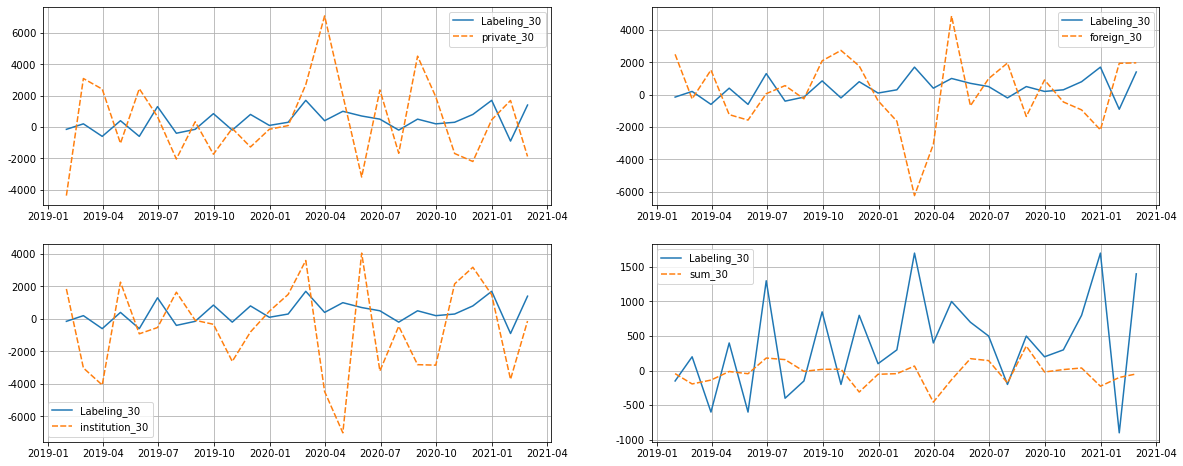

In [47]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
sns.lineplot(data=samsung_model_30[['Labeling_30', 'private_30']], ax=ax1)  
sns.lineplot(data=samsung_model_30[['Labeling_30', 'foreign_30']] , ax=ax2) 
sns.lineplot(data=samsung_model_30[['Labeling_30', 'institution_30']] , ax=ax3)  
sns.lineplot(data=samsung_model_30[['Labeling_30', 'sum_30']] , ax=ax4)  

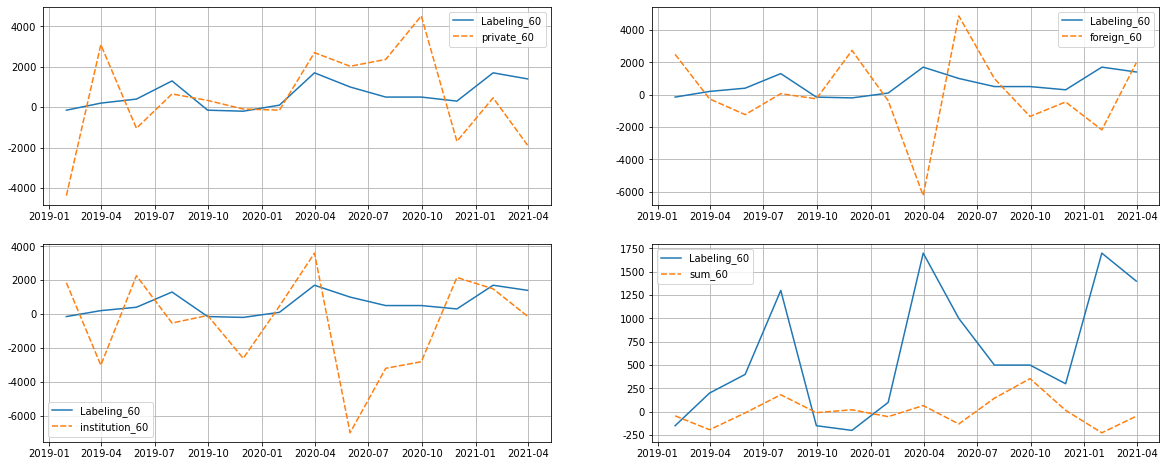

In [48]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
sns.lineplot(data=samsung_model_60[['Labeling_60', 'private_60']], ax=ax1)  
sns.lineplot(data=samsung_model_60[['Labeling_60', 'foreign_60']] , ax=ax2) 
sns.lineplot(data=samsung_model_60[['Labeling_60', 'institution_60']] , ax=ax3)  
sns.lineplot(data=samsung_model_60[['Labeling_60', 'sum_60']] , ax=ax4)  

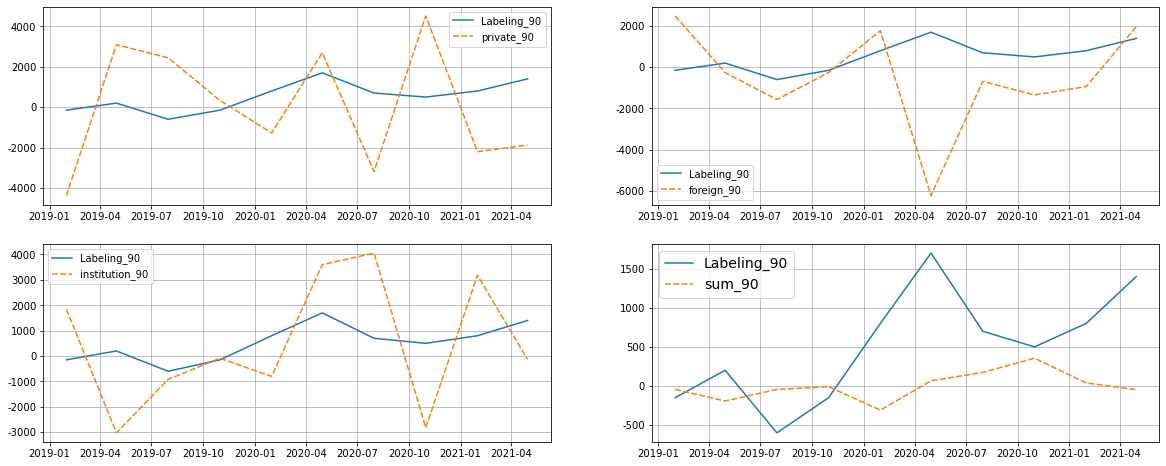

In [49]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
sns.lineplot(data=samsung_model_90[['Labeling_90', 'private_90']], ax=ax1)  
sns.lineplot(data=samsung_model_90[['Labeling_90', 'foreign_90']] , ax=ax2) 
sns.lineplot(data=samsung_model_90[['Labeling_90', 'institution_90']] , ax=ax3)  
sns.lineplot(data=samsung_model_90[['Labeling_90', 'sum_90']] , ax=ax4)  
plt.legend(fontsize=14, loc='best')

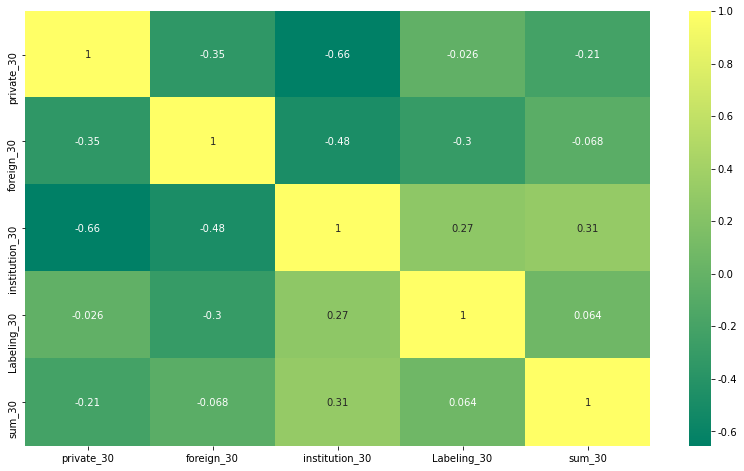

In [50]:
sns.heatmap(samsung_model_30.corr(), annot=True, cmap='summer')

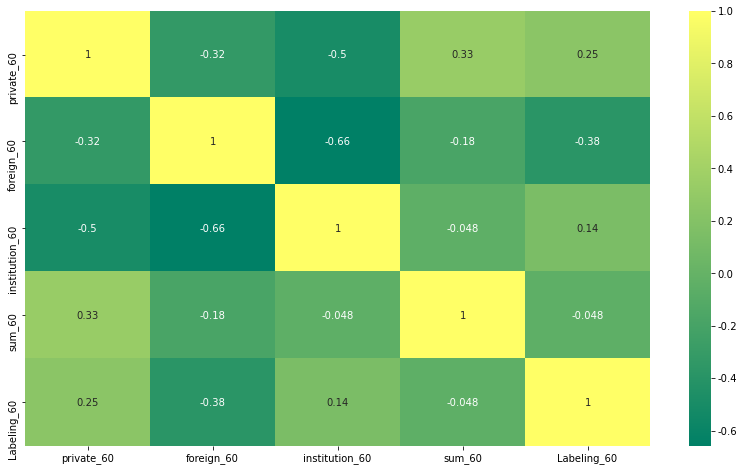

In [51]:
sns.heatmap(samsung_model_60.corr(), annot=True, cmap='summer')

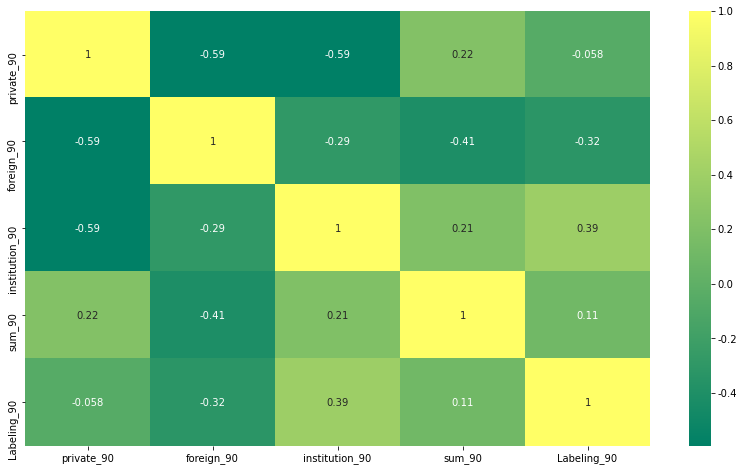

In [52]:
sns.heatmap(samsung_model_90.corr(), annot=True, cmap='summer')

In [53]:
samsung_model_30['private_30'] = samsung_model_30['private_30'].shift(-1).fillna(samsung_model_30.mean())
samsung_model_30['foreign_30'] = samsung_model_30['foreign_30'].shift(-1).fillna(samsung_model_30.mean())
samsung_model_30['institution_30'] = samsung_model_30['institution_30'].shift(-1).fillna(samsung_model_30.mean())
samsung_model_30['sum_30'] = samsung_model_30['sum_30'].shift(-1).fillna(samsung_model_30.mean())
samsung_model_30.dropna()

,private_30,foreign_30,institution_30,Labeling_30,sum_30
2019-01-31,3093.0,-262.0,-3024.0,-150.0,-193.0
2019-02-28,2417.0,1521.0,-4075.0,200.0,-137.0
2019-03-31,-1044.0,-1233.0,2264.0,-600.0,-13.0
2019-04-30,2444.0,-1570.0,-919.0,400.0,-45.0
2019-05-31,654.0,60.0,-532.0,-600.0,182.0
2019-06-30,-2046.0,559.0,1646.0,1300.0,159.0
2019-07-31,334.0,-257.0,-87.0,-400.0,-10.0
2019-08-31,-1740.0,2090.0,-332.0,-150.0,18.0
2019-09-30,-92.0,2732.0,-2619.0,850.0,21.0
2019-10-31,-1277.0,1771.0,-804.0,-200.0,-310.0


In [54]:
samsung_model_60['private_60'] = samsung_model_60['private_60'].shift(-1).fillna(samsung_model_60.mean())
samsung_model_60['foreign_60'] = samsung_model_60['foreign_60'].shift(-1).fillna(samsung_model_60.mean())
samsung_model_60['institution_60'] = samsung_model_60['institution_60'].shift(-1).fillna(samsung_model_60.mean())
samsung_model_60['sum_60'] = samsung_model_60['sum_60'].shift(-1).fillna(samsung_model_30.mean())
samsung_model_60.dropna()

,private_60,foreign_60,institution_60,sum_60,Labeling_60
2019-01-31,3093.0,-262.0,-3024.0,-193.0,-150.0
2019-03-31,-1044.0,-1233.0,2264.0,-13.0,200.0
2019-05-31,654.0,60.0,-532.0,182.0,400.0
2019-07-31,334.0,-257.0,-87.0,-10.0,1300.0
2019-09-30,-92.0,2732.0,-2619.0,21.0,-150.0
2019-11-30,-147.0,-375.0,469.0,-53.0,-200.0
2020-01-31,2700.0,-6233.0,3599.0,66.0,100.0
2020-03-31,2026.0,4863.0,-7020.0,-131.0,1700.0
2020-05-31,2363.0,991.0,-3209.0,145.0,1000.0
2020-07-31,4520.0,-1345.0,-2820.0,355.0,500.0


In [55]:
samsung_model_90['private_90'] = samsung_model_90['private_90'].shift(-1).fillna(samsung_model_90.mean())
samsung_model_90['foreign_90'] = samsung_model_90['foreign_90'].shift(-1).fillna(samsung_model_90.mean())
samsung_model_90['institution_90'] = samsung_model_90['institution_90'].shift(-1).fillna(samsung_model_90.mean())
samsung_model_90['sum_90'] = samsung_model_90['sum_90'].shift(-1).fillna(samsung_model_30.mean())
samsung_model_90.dropna()

,private_90,foreign_90,institution_90,sum_90,Labeling_90
2019-01-31,3093.0,-262.0,-3024.0,-193.0,-150.0
2019-04-30,2444.0,-1570.0,-919.0,-45.0,200.0
2019-07-31,334.0,-257.0,-87.0,-10.0,-600.0
2019-10-31,-1277.0,1771.0,-804.0,-310.0,-150.0
2020-01-31,2700.0,-6233.0,3599.0,66.0,800.0
2020-04-30,-3195.0,-686.0,4054.0,173.0,1700.0
2020-07-31,4520.0,-1345.0,-2820.0,355.0,700.0
2020-10-31,-2204.0,-940.0,3182.0,38.0,500.0
2021-01-31,-1883.0,1966.0,-131.0,-48.0,800.0


In [59]:
model_samsung.fillna(model_samsung.mean())

,Close,Volume,private,foreign,institution,Labeling,US,SNP500,SOXX,hang_seng,qqq
2019-01-04,37450.0,14108958.0,-4381.0,2491.0,1846.0,-150.0,1116.85,2531.939941,151.419434,25626.029297,154.075851
2019-01-07,38750.0,12748997.0,-191.0,1545.0,61.0,1300.0,1117.66,2549.689941,154.215530,25835.699219,155.910202
2019-01-08,38100.0,12756554.0,-873.0,-51.0,836.0,-650.0,1122.83,2574.409912,153.543304,25875.449219,157.320496
2019-01-10,39800.0,14731699.0,-1585.0,-1426.0,2951.0,200.0,1117.79,2596.639893,158.882233,26521.429688,159.056213
2019-01-11,40500.0,11661063.0,-594.0,1378.0,-1184.0,700.0,1118.23,2596.260010,160.587234,26667.269531,158.474335
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29,82000.0,39615978.0,16971.0,-14220.0,-2544.0,-1700.0,1117.64,3714.239990,391.420013,28283.710938,314.559998
2021-02-02,84400.0,26302077.0,-1883.0,1966.0,-131.0,1400.0,1115.37,3826.310059,413.480011,29248.699219,327.679993
2021-02-15,84200.0,23529706.0,-3526.0,7317.0,-4193.0,2600.0,1101.31,3097.949556,246.227790,26555.881582,222.043808
2021-02-16,84900.0,20483100.0,4226.0,2416.0,-6685.0,700.0,1106.58,3932.590088,439.359985,30746.660156,335.540009


In [60]:
model_samsung['private_1D'] = model_samsung['private'].shift(-1).fillna(model_samsung.mean())
#model_samsung['private_3D'] = model_samsung['private'].shift(-3).fillna(model_samsung.mean())
model_samsung['private_5D'] = model_samsung['private'].shift(-5).fillna(model_samsung.mean())
model_samsung['private_10D'] = model_samsung['private'].shift(-10).fillna(model_samsung.mean())

In [61]:
model_samsung['foreign_1D'] = model_samsung['foreign'].shift(-1).fillna(model_samsung.mean())
#model_samsung['foreign_3D'] = model_samsung['foreign'].shift(-3).fillna(model_samsung.mean())
model_samsung['foreign_5D'] = model_samsung['foreign'].shift(-5).fillna(model_samsung.mean())
model_samsung['foreign_10D'] = model_samsung['foreign'].shift(-10).fillna(model_samsung.mean())

In [62]:
model_samsung['institution_1D'] = model_samsung['institution'].shift(-1).fillna(model_samsung.mean())
#model_samsung['institution_3D'] = model_samsung['institution'].shift(-3).fillna(model_samsung.mean())
model_samsung['institution_5D'] = model_samsung['institution'].shift(-5).fillna(model_samsung.mean())
model_samsung['institution_10D'] = model_samsung['institution'].shift(-10).fillna(model_samsung.mean())

In [63]:
model_samsung['US_1D'] = model_samsung['US'].shift(-1).fillna(model_samsung.mean())
#model_samsung['US_3D'] = model_samsung['US'].shift(-3).fillna(model_samsung.mean())
model_samsung['US_5D'] = model_samsung['US'].shift(-5).fillna(model_samsung.mean())
model_samsung['US_10D'] = model_samsung['US'].shift(-10).fillna(model_samsung.mean())

In [64]:
model_samsung['SNP500_1D'] = model_samsung['SNP500'].shift(-1).fillna(model_samsung.mean())
#model_samsung['SNP500_3D'] = model_samsung['SNP500'].shift(-3).fillna(model_samsung.mean())
model_samsung['SNP500_5D'] = model_samsung['SNP500'].shift(-5).fillna(model_samsung.mean())
model_samsung['SNP500_10D'] = model_samsung['SNP500'].shift(-10).fillna(model_samsung.mean())

In [65]:
model_samsung['SOXX_1D'] = model_samsung['SOXX'].shift(-1).fillna(model_samsung.mean())
#model_samsung['SOXX_3D'] = model_samsung['SOXX'].shift(-3).fillna(model_samsung.mean())
model_samsung['SOXX_5D'] = model_samsung['SOXX'].shift(-5).fillna(model_samsung.mean())
model_samsung['SOXX_10D'] = model_samsung['SOXX'].shift(-10).fillna(model_samsung.mean())

In [66]:
model_samsung['hang_seng_1D'] = model_samsung['hang_seng'].shift(-1).fillna(model_samsung.mean())
#model_samsung['hang_seng_3D'] = model_samsung['hang_seng'].shift(-3).fillna(model_samsung.mean())
model_samsung['hang_seng_5D'] = model_samsung['hang_seng'].shift(-5).fillna(model_samsung.mean())
model_samsung['hang_seng_10D'] = model_samsung['hang_seng'].shift(-10).fillna(model_samsung.mean())

In [67]:
model_samsung['qqq_1D'] = model_samsung['qqq'].shift(-1).fillna(model_samsung.mean())
#model_samsung['qqq_3D'] = model_samsung['qqq'].shift(-3).fillna(model_samsung.mean())
model_samsung['qqq_5D'] = model_samsung['qqq'].shift(-5).fillna(model_samsung.mean())
model_samsung['qqq_10D'] = model_samsung['qqq'].shift(-10).fillna(model_samsung.mean())

In [78]:
model_samsung['Volume_1D'] = model_samsung['Volume'].shift(-1).fillna(model_samsung.mean())
#model_samsung['Volume_3D'] = model_samsung['Volume'].shift(-3).fillna(model_samsung.mean())
model_samsung['Volume_5D'] = model_samsung['Volume'].shift(-5).fillna(model_samsung.mean())
model_samsung['Volume_10D'] = model_samsung['Volume'].shift(-10).fillna(model_samsung.mean())

In [68]:
model_samsung['Close_10D'] = model_samsung['Close'].shift(-10).fillna(model_samsung.mean())
model_samsung['Close_20D'] = model_samsung['Close'].shift(-20).fillna(model_samsung.mean())
model_samsung['Close_30D'] = model_samsung['Close'].shift(-30).fillna(model_samsung.mean())

In [69]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close    Volume   private   foreign  institution  Labeling  \
2019-01-04  0.000000  0.176227  0.159346  0.716937     0.719504  0.382550   
2019-01-07  0.024880  0.151526  0.235208  0.691601     0.666795  0.577181   
2019-01-08  0.012440  0.151663  0.222860  0.648856     0.689680  0.315436   
2019-01-10  0.044976  0.187538  0.209969  0.612031     0.752133  0.429530   
2019-01-11  0.058373  0.131765  0.227911  0.687128     0.630031  0.496644   

                  US    SNP500      SOXX  hang_seng  ...  SOXX_10D  \
2019-01-04  0.170033  0.173750  0.000000   0.418573  ...       NaN   
2019-01-07  0.174338  0.184221  0.009711   0.440905  ...  0.003930   
2019-01-08  0.201818  0.198804  0.007376   0.445138  ...  0.000000   
2019-01-10  0.175029  0.211917  0.025918   0.513942  ...  0.032235   
2019-01-11  0.177368  0.211693  0.031839   0.529475  ...  0.044405   

            hang_seng_1D  hang_seng_5D  hang_seng_10D    qqq_1D    qqq_5D  \
2019-01-04      0.440905      0.490179 

In [83]:
#output
output_fix = output.drop(['Volume','private','foreign','institution','US','SNP500','SOXX','hang_seng','qqq'],axis = 1)

In [86]:
output_fix=output_fix.drop(['qqq'],axis = 1)

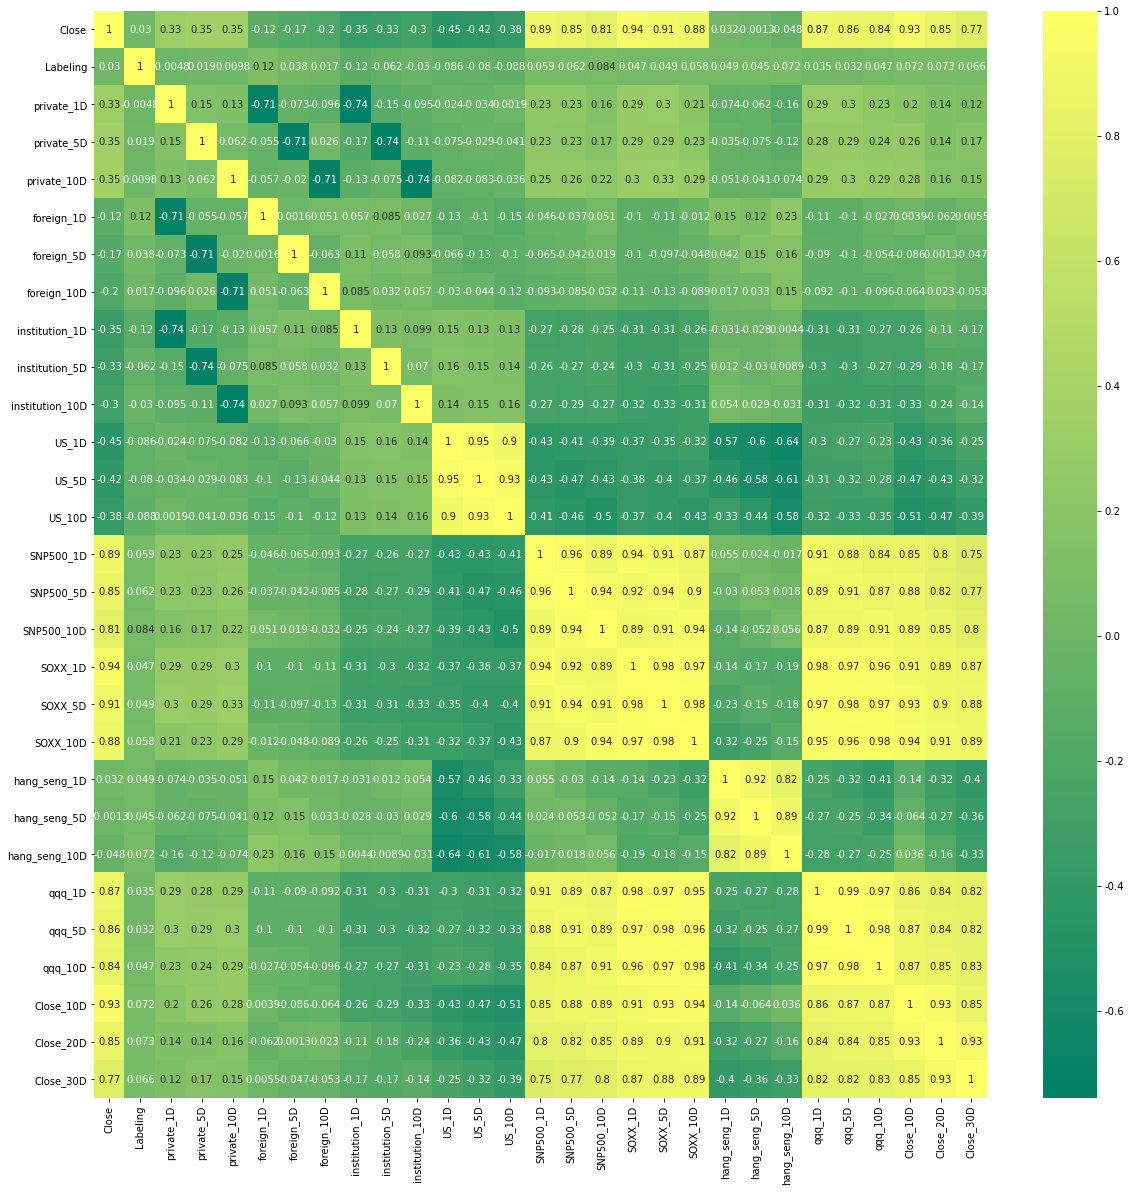

In [88]:
plt.figure(figsize=(20,20))
sns.heatmap(output_fix.corr(), annot=True, cmap='summer')

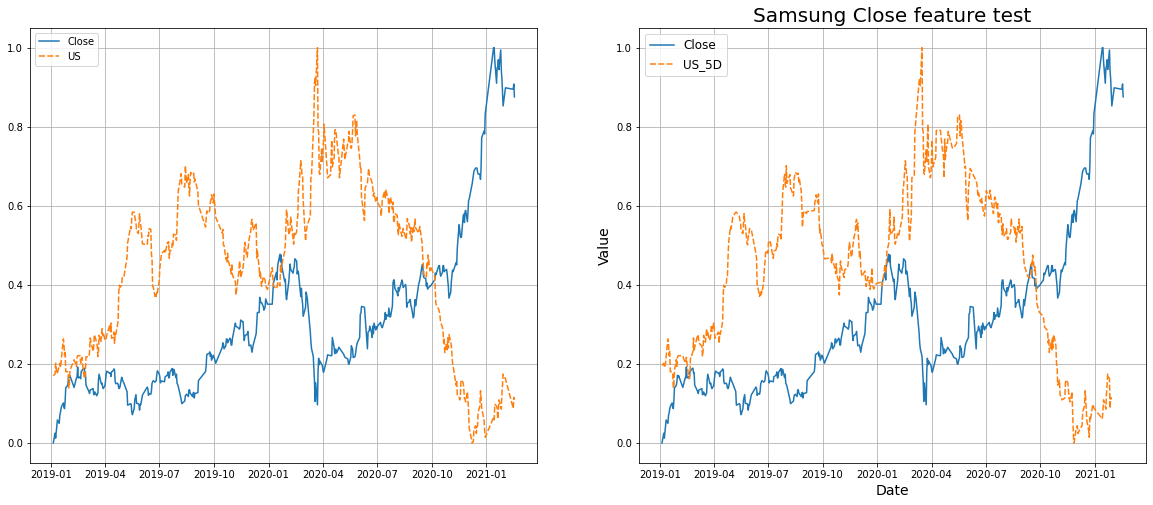

In [71]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.lineplot(data=output[['Close', 'US']], ax=ax1)  #'macdhist'
sns.lineplot(data=output[['Close', 'US_5D']] , ax=ax2)  #'macdhist'
plt.title('Samsung Close feature test', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')

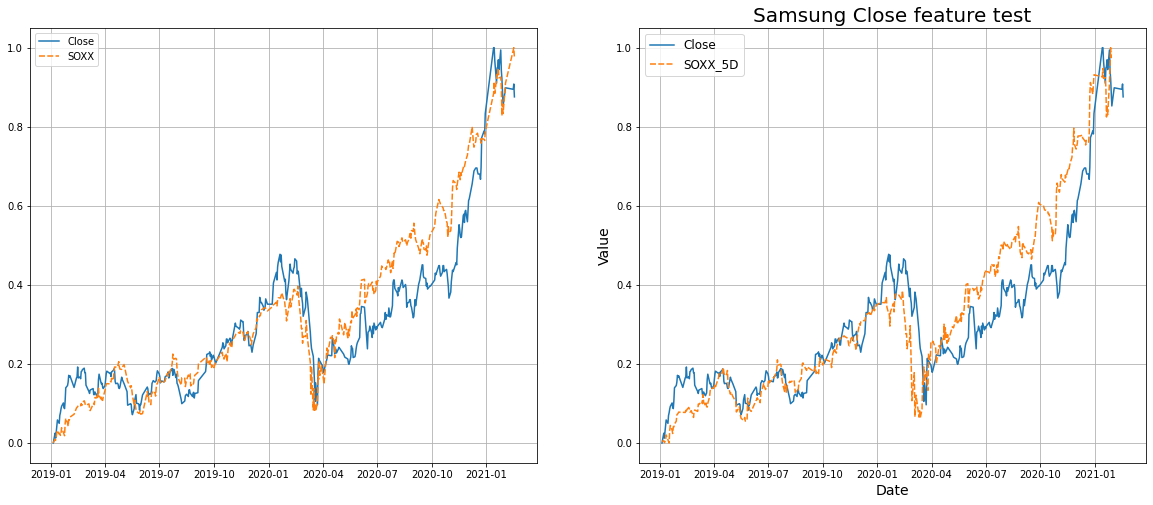

In [72]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.lineplot(data=output[['Close', 'SOXX']], ax=ax1)  #'macdhist'
sns.lineplot(data=output[['Close', 'SOXX_5D']] , ax=ax2)  #'macdhist'
plt.title('Samsung Close feature test', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')

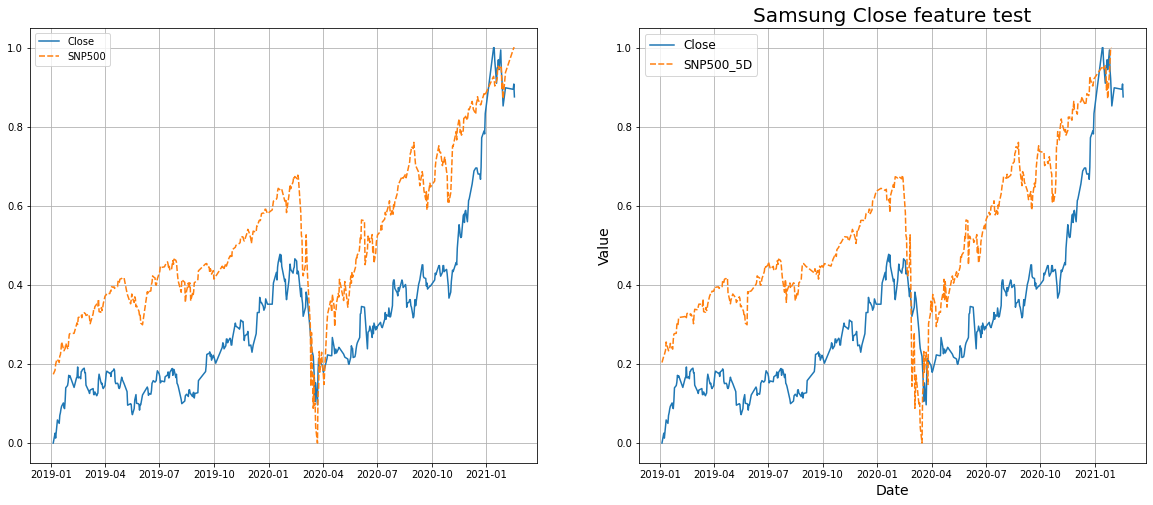

In [73]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.lineplot(data=output[['Close', 'SNP500']], ax=ax1)  #'macdhist'
sns.lineplot(data=output[['Close', 'SNP500_5D']] , ax=ax2)  #'macdhist'
plt.title('Samsung Close feature test', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')

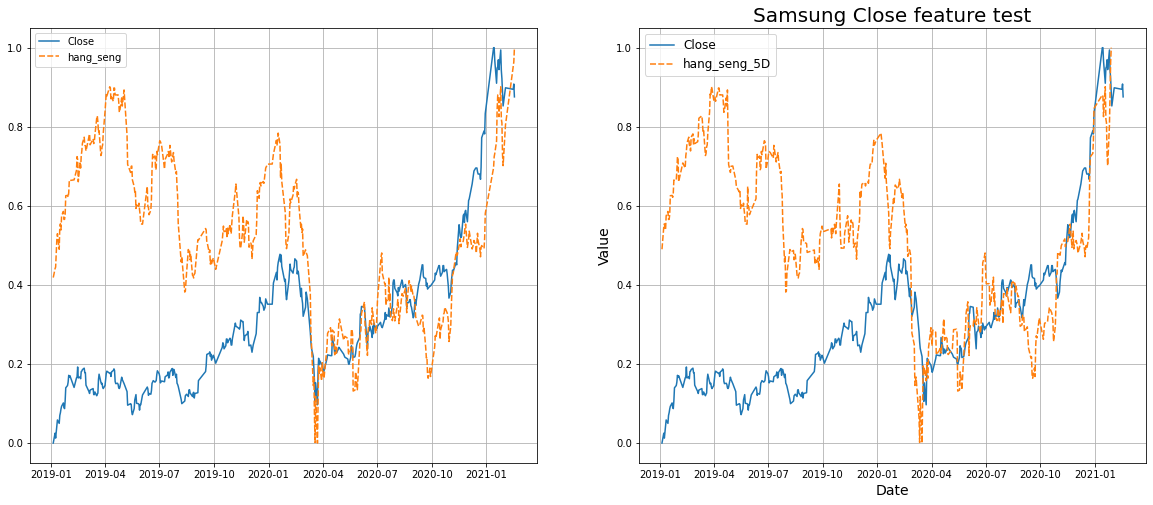

In [74]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.lineplot(data=output[['Close', 'hang_seng']], ax=ax1)  #'macdhist'
sns.lineplot(data=output[['Close', 'hang_seng_5D']] , ax=ax2)  #'macdhist'
plt.title('Samsung Close feature test', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')

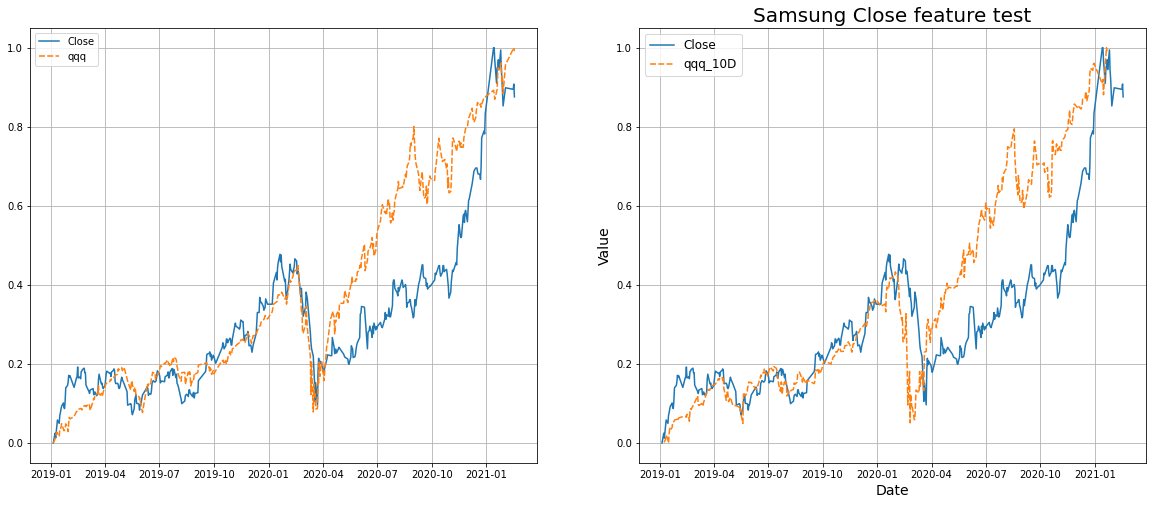

In [76]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.lineplot(data=output[['Close', 'qqq']], ax=ax1)  #'macdhist'
sns.lineplot(data=output[['Close', 'qqq_10D']] , ax=ax2)  #'macdhist'
plt.title('Samsung Close feature test', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')